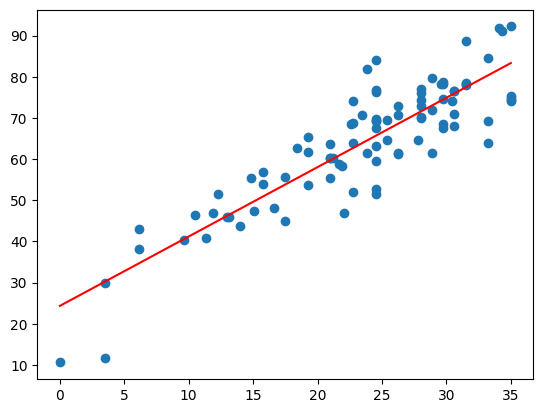

ls_m=1.684827, ls_c=24.347947
epoch 0: delta_m=3.227859, delta_c=0.128088, m=3.227859, c=0.128088
epoch 1000: delta_m=-0.000152, delta_c=0.003995, m=2.441183, c=4.530306
epoch 2000: delta_m=-0.000125, delta_c=0.003266, m=2.303106, c=8.148144
epoch 3000: delta_m=-0.000102, delta_c=0.002670, m=2.190235, c=11.105523
epoch 4000: delta_m=-0.000083, delta_c=0.002182, m=2.097970, c=13.523012
epoch 5000: delta_m=-0.000068, delta_c=0.001784, m=2.022548, c=15.499174
epoch 6000: delta_m=-0.000056, delta_c=0.001458, m=1.960895, c=17.114574
epoch 7000: delta_m=-0.000045, delta_c=0.001192, m=1.910497, c=18.435073
epoch 8000: delta_m=-0.000037, delta_c=0.000974, m=1.869300, c=19.514506
epoch 9000: delta_m=-0.000030, delta_c=0.000797, m=1.835623, c=20.396882
epoch 10000: delta_m=-0.000025, delta_c=0.000651, m=1.808094, c=21.118175
epoch 11000: delta_m=-0.000020, delta_c=0.000532, m=1.785591, c=21.707790
epoch 12000: delta_m=-0.000017, delta_c=0.000435, m=1.767196, c=22.189768
epoch 13000: delta_m=-0.0

In [7]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

def first_practice():
    # scikit-learn 역시 linear regression을 지원하나,
    # 통계적 검정 부분이 결여되어 있어
    # statsmodels를 사용할 것이다.

    EXCEL_FILE = 'score.xlsx'
    data = pd.read_excel(EXCEL_FILE)

    X = data[['attendance', 'midterm', 'homework', 'discussion']]
    X = np.array(X)
    X = sm.add_constant(X)

    y = data['score']
    y = np.array(y)

    model = sm.OLS(y, X)
    results = model.fit()
    print(results.summary())

    """
    score = 3.7408 * attendance + 1.5139 * midterm + 0.9097 * homework
               + 1.2171 * discussion + (-17.7479)
               로 linear regression 모델이 그려진 것
    """

def load_data():
    EXCEL_FILE = 'score.xlsx'
    data = pd.read_excel(EXCEL_FILE)

    X = data['midterm']
    X = np.array(X)
    y = data['score']
    y = np.array(y)

    return X, y

def least_square(X, y):
    X_const = sm.add_constant(X)
    
    model = sm.OLS(y, X_const)
    ls = model.fit()
    
    ls_c = ls.params[0] # constant
    ls_m = ls.params[1] # m
    
    y_pred = ls_m * X + ls_c
    plt.scatter(X, y)
    plt.plot([ min(X), max(X) ], [ min(y_pred), max(y_pred) ], color='red')
    plt.show()
    
    return ls_c, ls_m

def gradient_descent(X, y):
    epochs = 100000
    min_gradient = 0.00001
    learning_rate = 0.001
    
    m, c, n = 0.0, 0.0, len(y)
    
    for epoch in range(epochs):
        m_partial = 0.0
        c_partial = 0.0
        
        for i in range(n):
            y_pred = m * X[i] + c
            m_partial += (y_pred - y[i]) * X[i]
            c_partial += (y_pred - y[i])
            
        m_partial *= 2/n
        c_partial *= 2/n
        
        delta_m = -learning_rate * m_partial
        delta_c = -learning_rate * c_partial
        
        if (abs(delta_m) < min_gradient and abs(delta_c) < min_gradient):
            break
            
        m = m + delta_m
        c = c + delta_c
        
        if (epoch % 1000 == 0):
            print('epoch %d: delta_m=%f, delta_c=%f, m=%f, c=%f' %(epoch, delta_m, delta_c, m, c))
            
    return m, c

def second_practice():
    X, y = load_data()
    ls_c, ls_m = least_square(X, y)
    print('ls_m=%f, ls_c=%f' %(ls_m, ls_c))
    
    gd_m, gd_c = gradient_descent(X, y)
    print('gd_m=%f, gd_c=%f' %(gd_m, gd_c))

if __name__=='__main__':
    #first_practice()
    second_practice()
